# Practice Exercises: Hash tables

### Exercise 1

Demonstrate what happens when we insert the keys 5, 28, 19, 15, 20, 33, 12, 17, 10
into a hash table with collisions resolved by chaining. Let the table have 9 slots,
and let the hash function be $h(k) = k \mod 9$.

**Solution:**

The key 5 is inserted in a linked list in cell $5 \mod 9 = 5$. Then 28 is hashed to $28 \mod 9 = 1$ and inserted there. Also 19 is hashed to $19 \mod 9 = 1$. Assuming that we insert at the head of the linked list, this results in 19 occuring in the list before 28. (Note: since we are using a doubly linked list anyway to support efficient deletion, we could just as well insert at the tail.) And so on. The resulting table is the following:

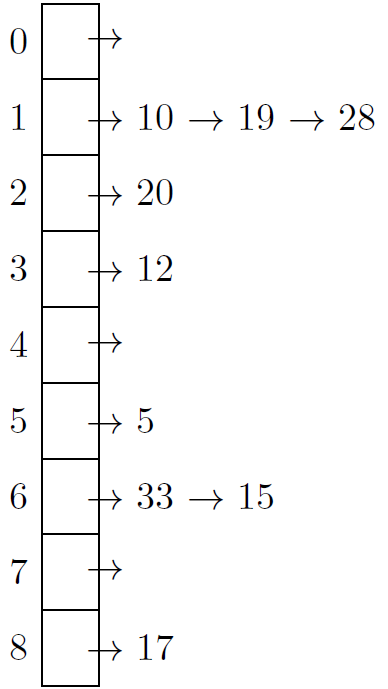

### Exercise 2

Professor Marley hypothesizes that he can obtain substantial performance gains by
modifying the chaining scheme to keep each list in sorted order. How does the professor’s
modification affect the running time for successful searches, unsuccessful
searches, insertions, and deletions?

**Solution:**

First lets recall the running time of the operations if unsorted lists are used. If the corresponding list has length $m$, then the running times are:

- successful search: $O(m)$ (can be tightened if we know the insertion order), on average $O(1 + \alpha)$, where alpha is the load factor
- unsuccessful search: $\Theta(m)$, on average $O(1 + \alpha)$
- insert: $\Theta(1)$, on average $\Theta(1)$
- delete: $\Theta(1)$, on average $\Theta(1)$

Now let us considered the case that we maintain a sorted list. Note that 'list' here again means a 'linked list'. 

- In a linked list we can't search more efficiently than by a linear scan. So this will still take $O(m)$ and $\Theta(m)$, and $O(1 + \alpha)$ on average. 
- insert now taked linear time in the length of the corresponding list, because we first need to search the list to find the position to insert it. Thus, the running time of insert deteriorates to $O(m)$ and $O(1 + \alpha)$ on average.
- delete can still be done in $O(1)$ time.

In conclusion Professor Marley's idea is not that good. But as long as the load factor is constant, all operations still take constant time on average. More intersting would have been a different data structure, like a sorted array, but given that for constant load factor the expected running time of all operations is $O(1)$ anyway, none of this is really helpful.

### Exercise 3

Consider inserting keys into a hash table of length $m =  13$  using open addressing with the auxiliary hash function $h'(k) = k\mod m$. Does quadratic probing with $c_1 = c_2 = 1$ result in a probe sequence that is a permutation of $0, 1, \dots, 12$? Justify your answer.

**Solution:**

No. The probe sequence for $k = 0$ is:

- $0$
- $0 + 1 + 1*1 \mod 13 = 2$
- $0 + 2 + 2*2 \mod 13 = 6 \mod 13 = 6$
- $0 + 3 + 3*3 \mod 13 = 12 \mod 13 = 12$
- $0 + 4 + 4*4 \mod 13 = 20 \mod 13 = 7$
- $0 + 5 + 5*5 \mod 13 = 30 \mod 13 = 4$
- $0 + 6 + 6*6 \mod 13 = 42 \mod 13 = 3$
- $0 + 7 + 7*7 \mod 13 = 56 \mod 13 = 4$
- $\ldots$

Thus, $h(k, 5) = h(k,7)$, therefore the probe sequence is not a permutation.



### Exercise 4

(a) Assume that we are using a hash table of size $m$. Show that if the universe $U$  has size $|U| > nm$, there is a subset of $U$ of size $n$ with the property that they all hash to the same position, so that the worst-case searching time for hashing with chaining is $\Theta(n)$.

(b) We are storing a set $S$ of $n$ numbers in a hash table
 $T[0..m-1]$ of size $m$ and we are choosing $m=n$. Should we resolve collisions with chaining or open addressing? Explain your answer.

**Solution:**

(a) Consider the situation that would occur when we insert $nm$ elements from $U$ into the hashtable. By the pigeonhole principle there is a cell $j$ such that $n$ elements are hashed to cell $j$. (In case, this is not immediately clear: assume all cells get less than $n$ elements. then adding up all elements from all $m$ cells would result in a number $\leq (n-1)m < nm$, which contradicts the setting that we had inserted $nm$ elements).

Let $a_1, \ldots, a_n$ be $n$ elements of the elements hashed to cell $j$. This is a subset with the required property. If we now assume that our whole input consists of $a_1, \ldots, a_n$, then we indeed get a worst-case search time of $\Theta(n)$, namely if we search for the last element in the list of cell $j$.

(b) Chaining. The load factor is $\alpha = 1$. Searching when using chaining takes $O(1 + \alpha) = O(2) = O(1)$ time. An unsuccessul search when using opend addressing will now always take $\Theta(n)$ time, which is clearly worse. (Note: in practice, when we use open addressing, we resize the table before it is full. Thus, then the case $m=n$ would not occur. You can see this exercise as an argument why for open addressing the resizing is important.)